📝 Tasks

1.Load the dataset and identify the relevant columns.

2.Use:
Engine size as the input feature
Car price as the output variable

3.Visualize the relationship between engine size and price.

4.Build a predictive model to estimate car price based on engine size.

5.Predict the price for a car with:
Engine size = 200

In [4]:
import numpy as np
import pandas as pd

# Load dataset
dataset = pd.read_csv('CarPrice_Assignment.csv')

# Select input and output
X = dataset[['enginesize']].values
y = dataset['price'].values

print(dataset[['enginesize', 'price']].head())



   enginesize    price
0         130  13495.0
1         130  16500.0
2         152  16500.0
3         109  13950.0
4         136  17450.0


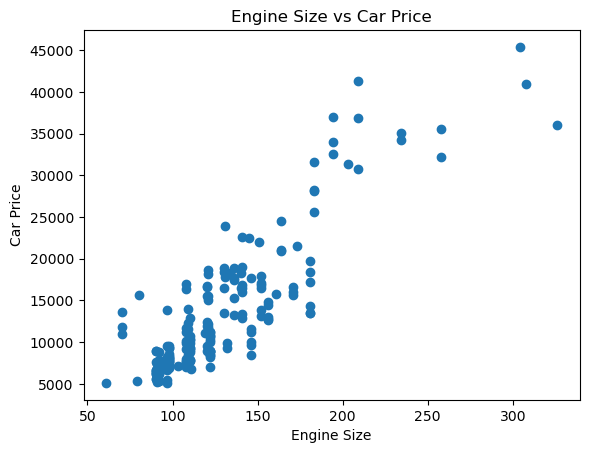

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Engine Size vs Car Price')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)



Training size: (164, 1)
Testing size: (41, 1)


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial transformation
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)



LinearRegression()

if Accuracy score is less then,it refres to ovefitting

if Accuracy score is high(100%) then it refer to overfitting.

In [8]:
from sklearn.metrics import r2_score

# Predictions
y_pred = model.predict(X_test_poly)

# Evaluation
r2 = r2_score(y_test, y_pred)
print("Accuracy(R²) Score:", r2)   

# Predict for Engine Size = 200
engine_size = np.array([[200]])
engine_poly = poly.transform(engine_size)
predicted_price = model.predict(engine_poly)
print("Predicted price for engine size 200:", predicted_price[0])




Accuracy(R²) Score: 0.8527894915155396
Predicted price for engine size 200: 27760.6083451159


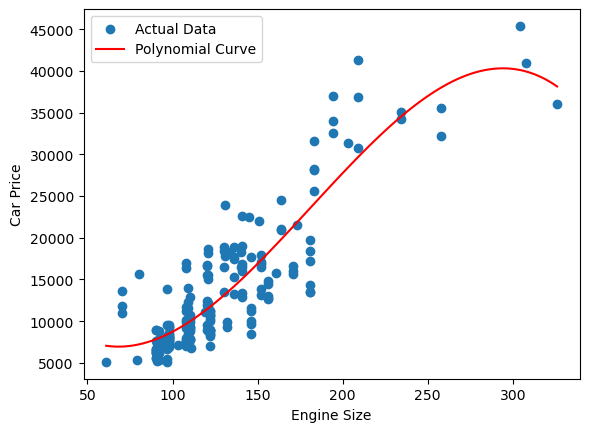

In [9]:
X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)

plt.scatter(X, y, label='Actual Data')
plt.plot(X_grid, model.predict(X_grid_poly), color='red', label='Polynomial Curve')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.legend()
plt.show()



6.Increase the flexibility of your model and observe how the curve changes.

7.Compare predictions from:
a simple straight-line model
a curved model

8.Analyze which model:
captures the trend better
gives more realistic predictions

9.valuate prediction errors and interpret them in business terms.

10.Answer the following:
Why does a straight-line model fail here?
What risk occurs if the curve becomes too flexible?
Which model would you recommend for production and why?
 

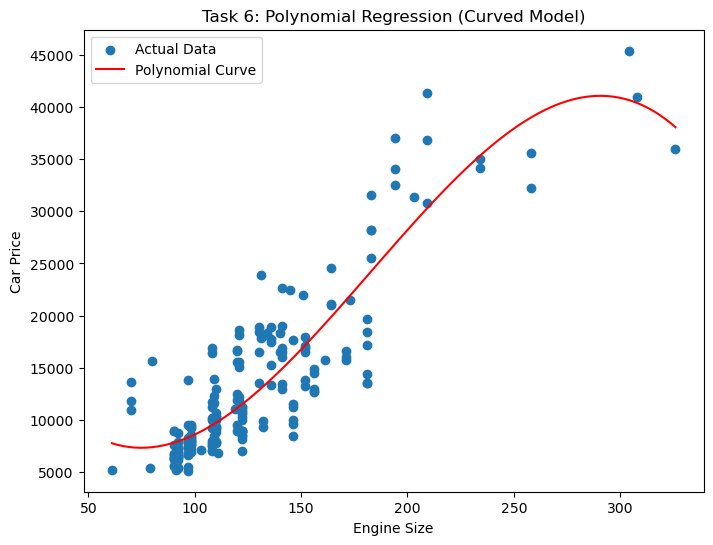

In [10]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial Regression (curved model)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X_grid, poly_model.predict(X_grid_poly), color='red', label='Polynomial Curve')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Task 6: Polynomial Regression (Curved Model)')
plt.legend()
plt.show()

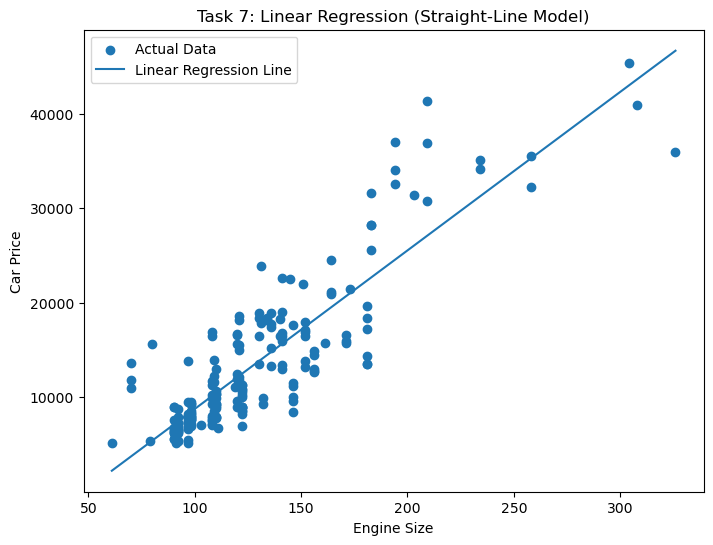

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Create smooth X values for plotting
X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# 👉 DEFINE linear_line (THIS WAS MISSING)
linear_line = linear_model.predict(X_grid)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X_grid, linear_line, label='Linear Regression Line')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Task 7: Linear Regression (Straight-Line Model)')
plt.legend()
plt.show()


In [12]:
import numpy as np

engine_size = np.array([[200]])

# Linear prediction
linear_pred = linear_model.predict(engine_size)

# Polynomial prediction
engine_poly = poly.transform(engine_size)
poly_pred = poly_model.predict(engine_poly)

print("Linear Model Prediction:", linear_pred[0])
print("Polynomial Model Prediction:", poly_pred[0])


Linear Model Prediction: 25534.237747489224
Polynomial Model Prediction: 28207.451636903494


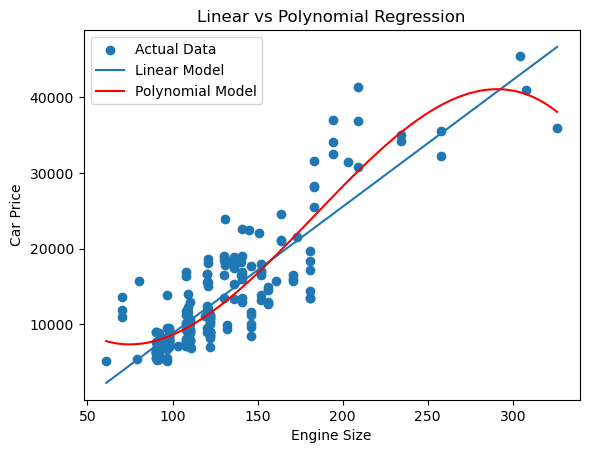

In [13]:
import matplotlib.pyplot as plt

X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predictions
linear_line = linear_model.predict(X_grid)
poly_curve = poly_model.predict(poly.transform(X_grid))

plt.scatter(X, y, label='Actual Data')
plt.plot(X_grid, linear_line, label='Linear Model')
plt.plot(X_grid, poly_curve, label='Polynomial Model', color='red')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error

# Errors
linear_mse = mean_squared_error(y, linear_model.predict(X))
poly_mse = mean_squared_error(y, poly_model.predict(X_poly))

print("Linear Model MSE:", linear_mse)
print("Polynomial Model MSE:", poly_mse)


Linear Model MSE: 14980261.40555132
Polynomial Model MSE: 13091524.999302799



1️⃣ Why does a straight-line model fail here?

A straight-line (linear) model fails because the relationship between engine size and car price is non-linear.
In reality, as engine size increases, car prices often rise at an increasing rate due to added power, luxury features, brand value, and performance upgrades.
A linear model cannot capture this curvature, leading to underfitting and inaccurate predictions, especially for higher engine sizes.

2️⃣ What risk occurs if the curve becomes too flexible?

If the curve becomes too flexible (high-degree polynomial), the model may overfit the data.
This means it starts learning noise instead of the true trend, resulting in:

Very good performance on training data

Poor predictions on unseen data

Unstable and unreliable business decisions

3️⃣ Which model would you recommend for production and why?

I would recommend a moderate-degree polynomial regression model (e.g., degree 2 or 3).
This model:

Captures the non-linear trend in car prices

Avoids excessive overfitting

Produces realistic and stable predictions

Is suitable for real-world pricing and decision-making


In [15]:
#find trainings and testing accuracy of both models
from sklearn.metrics import r2_score
# Training and Testing accuracy for Linear Model
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)
train_r2_linear = r2_score(y_train, y_train_pred_linear)
test_r2_linear = r2_score(y_test, y_test_pred_linear)
print("Linear Model - Training R²:", train_r2_linear)
print("Linear Model - Testing R²:", test_r2_linear)
# Training and Testing accuracy for Polynomial Model
y_train_pred_poly = poly_model.predict(poly.transform(X_train))
y_test_pred_poly = poly_model.predict(poly.transform(X_test))
train_r2_poly = r2_score(y_train, y_train_pred_poly)
test_r2_poly = r2_score(y_test, y_test_pred_poly)
print("Polynomial Model - Training R²:", train_r2_poly)
print("Polynomial Model - Testing R²:", test_r2_poly)



Linear Model - Training R²: 0.750597282039292
Linear Model - Testing R²: 0.8048496655399958
Polynomial Model - Training R²: 0.7719655513268451
Polynomial Model - Testing R²: 0.8599045323538128


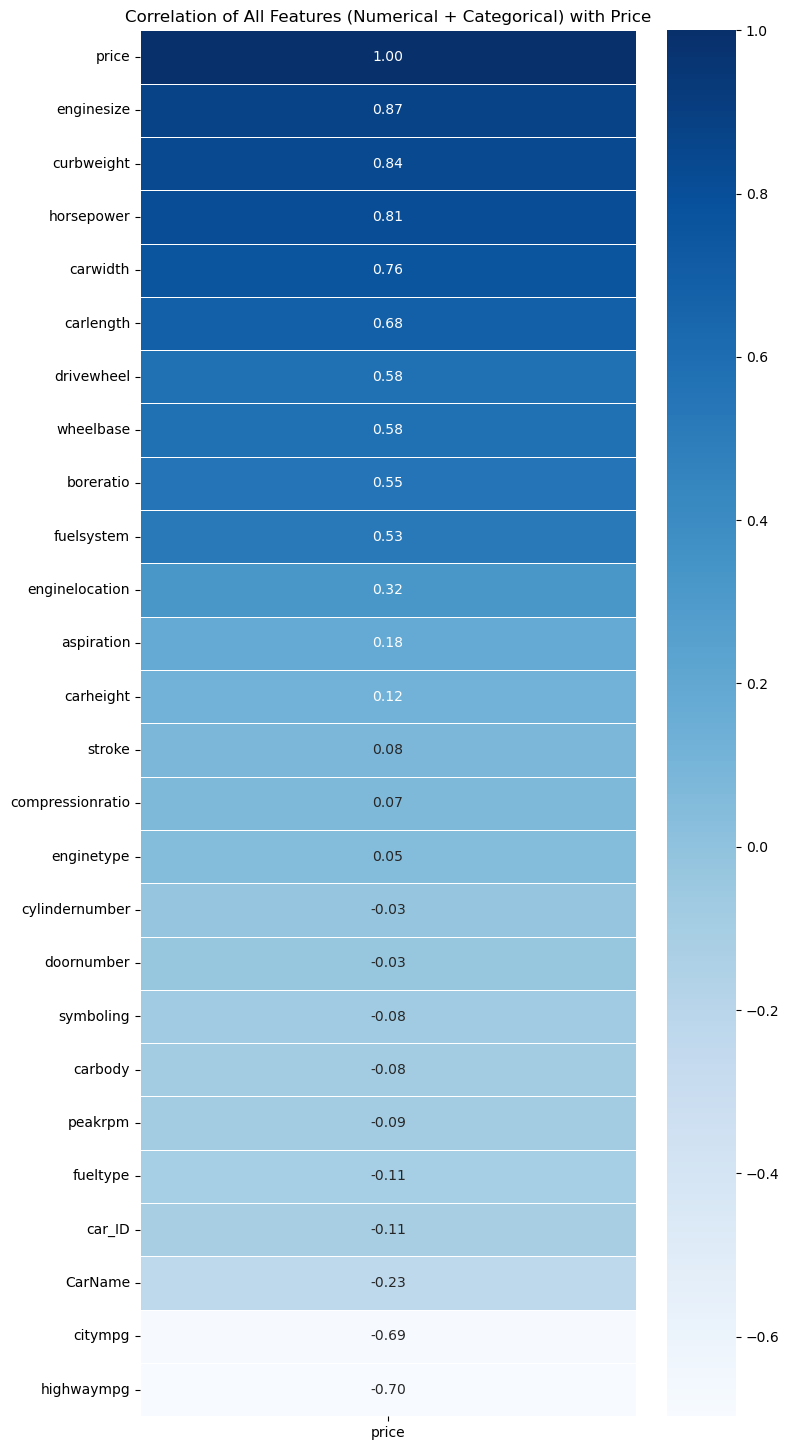

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Copy the dataframe to avoid changing original
df_encoded = df.copy()

# Encode categorical columns
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Compute correlation with price
price_corr = df_encoded.corr()['price'].sort_values(ascending=False)

# Convert to DataFrame for heatmap
price_corr_df = pd.DataFrame(price_corr)

# Plot heatmap
plt.figure(figsize=(8,18))  # Adjust height for all features
sns.heatmap(price_corr_df, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Correlation of All Features (Numerical + Categorical) with Price")
plt.show()



## Sample Insights from Correlation Heatmap:
1. Highly positive with price (>0.7):

engine-size, curb-weight, horsepower, bore → bigger and stronger cars cost more.

2. Strong negative (<-0.5):

city-mpg, highway-mpg → fuel-efficient cars tend to cost less.

3. Weak correlation (~0):

stroke, num-of-doors, compression-ratio → minimal impact on price.

4. Modeling tip:

Features with high positive or negative correlation are best predictors for regression.

Weakly correlated features can be ignored or used carefully to avoid noise.

Strong Positive: 0.7 to 1.0

Moderate Positive: 0.5 to 0.7

Weak Positive: 0.3 to 0.5

Very Weak Positive: 0 to 0.3

Strong Negative: -0.7 to -1.0

Moderate Negative: -0.5 to -0.7

Weak Negative: -0.3 to -0.5

Very Weak Negative: -0.0 to -0.3

**Feature Insights with Correlation to Price:**

- **engine-size**: 0.87 (Strong Positive)  
→ Bigger engines usually cost more.  

- **curb-weight**: 0.84 (Strong Positive)  
→ Heavier cars tend to be more expensive.  

- **horsepower**: 0.81 (Strong Positive)  
→ More powerful engines lead to higher prices.  

- **width**: 0.75 (Moderate Positive)  
→ Wider cars tend to have higher prices.  

- **length**: 0.69 (Moderate Positive)  
→ Longer cars are slightly more expensive.  

- **bore**: 0.56 (Moderate Positive)  
→ Larger cylinder diameter often increases price.  

- **city-mpg**: -0.69 (Moderate Negative)  
→ Cars with better city fuel efficiency tend to cost less.  

- **highway-mpg**: -0.66 (Moderate Negative)  
→ Cars with better highway fuel efficiency also tend to cost less.  

- **engine-type**: 0.30 (Weak Positive)  
→ Some engine types are pricier than others.  

- **fuel-type**: 0.26 (Weak Positive)  
→ Diesel cars are generally more expensive than gasoline cars.  

- **aspiration**: 0.15 (Very Weak Positive)  
→ Turbo vs standard has a small impact on price.  

- **num-of-doors**: 0.02 (Very Weak Positive)  
→ Number of doors has little influence on price.  

- **body-style**: 0.35 (Weak Positive)  
→ Convertibles or sedans are generally pricier than hatchbacks.  

- **drive-wheels**: 0.58 (Moderate Positive)  
→ AWD/4WD cars tend to cost more than FWD.  

- **engine-location**: 0.58 (Moderate Positive)  
→ Rear-engine cars can be more expensive than front-engine cars.  

- **stroke**: 0.08 (Very Weak Positive)  
→ Cylinder stroke has minimal effect on price.  

- **compression-ratio**: 0.11 (Very Weak Positive)  
→ Compression ratio slightly affects price.  

- **peak-rpm**: -0.11 (Very Weak Negative)  
→ Engine peak rpm has minimal influence.  

- **symboling**: -0.08 (Very Weak Negative)  
→ Insurance risk rating does not strongly affect price.  

- **wheel-base**: 0.58 (Moderate Positive)  
→ Longer wheelbase slightly increases price.  

- **height**: 0.06 (Very Weak Positive)  
→ Taller cars have almost no influence on price.  

- **fuel-system**: 0.26 (Weak Positive)  
→ Fuel system type has a small effect.  

- **price**: 1.00 (Target Variable)  
→ This is the dependent variable we are predicting.


## WEEK VALUES

stroke – Very weak positive (0.08)

compressionratio – Very weak positive (0.07)

enginetype – Very weak positive (0.05)

doornumber – Very weak negative (-0.03)

cylindernumber – Very weak negative (-0.03)

symboling – Weak negative (-0.08)

peakrpm – Weak negative (-0.09)

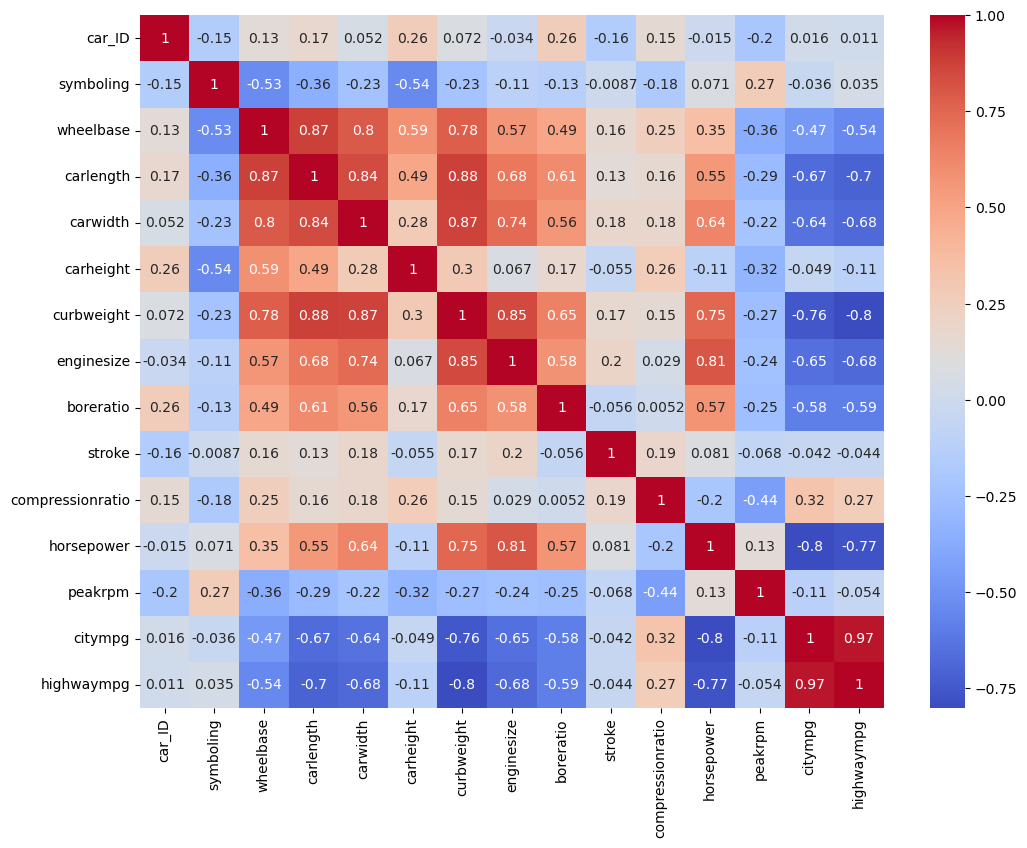

In [17]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

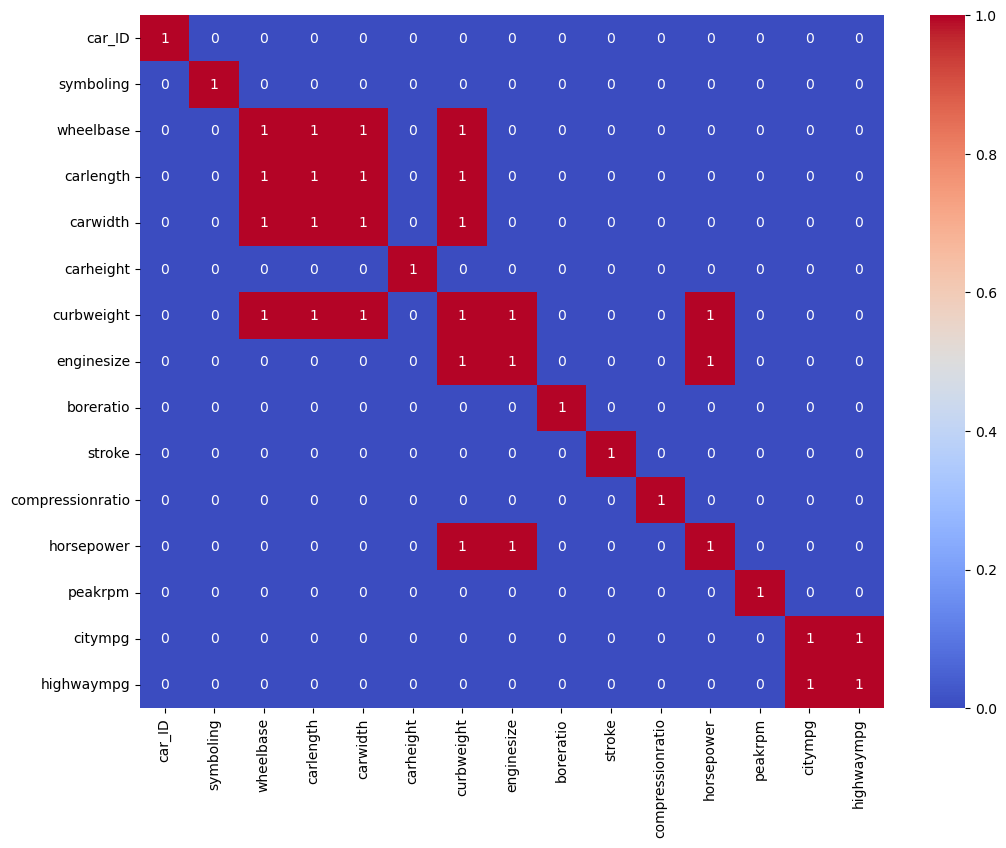

In [18]:
## Mutlicollinearity check
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()

##### Feature to feature values
wheelbase ↔ carlength
wheelbase-->carlength(0.87)

wheelbase-->carwidth(0.8)

wheelbase-->curbweight(0.78)

carlength-->carwidth(0.84)

carlength-->curbweight(0.88)

carwidth-->curbweight(0.87)

curbweight-->enginesize(0.85)

curbweight-->horsepower(0.75)

enginesize-->horsepower(0.81)

citympg-->highwaympg(0.97)

In [19]:
### Remove features that have high multicollinearity and has less correlation with target to remove noise and columns with less correlation with price.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# copy dataframe
df_model = df.copy()

# encode categorical columns
le = LabelEncoder()
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        df_model[col] = le.fit_transform(df_model[col])

# drop specified columns
df_model.drop(
    columns=['doornumber', 'cylindernumber', 'enginetype', 'compressionratio', 'wheelbase'],
    inplace=True
)

# split features and target
X = df_model.drop('price', axis=1)
y = df_model['price']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train R² Score:", train_score)
print("Test R² Score:", test_score)
# this is called regularization


Train R² Score: 0.9036161653130529
Test R² Score: 0.8635871948799018


In [20]:
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_train_score = ridge_model.score(X_train, y_train)
lasso_train_score = lasso_model.score(X_train, y_train)
ridge_test_score = ridge_model.score(X_test, y_test)
lasso_test_score = lasso_model.score(X_test, y_test)
print("Ridge Train R² Score:", ridge_train_score)
print("Lasso Train R² Score:", lasso_train_score)
print("Ridge Test R² Score:", ridge_test_score)
print("Lasso Test R² Score:", lasso_test_score)


Ridge Train R² Score: 0.9002250749322843
Lasso Train R² Score: 0.9036161330586229
Ridge Test R² Score: 0.8665626056676989
Lasso Test R² Score: 0.8636056474060849


In [21]:
# predictions
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
from sklearn.metrics import r2_score
ridge_r2 = r2_score(y_test, y_pred_ridge)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print("Ridge R² Score:", ridge_r2)
print("Lasso R² Score:", lasso_r2)


Ridge R² Score: 0.8665626056676989
Lasso R² Score: 0.8636056474060849


In [22]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)



Ridge MSE: 10534084.444296291
Lasso MSE: 10767518.619041426


In [23]:
import numpy as np
from sklearn.linear_model import RidgeCV

# Define alpha values FIRST
alphas = np.arange(0.1, 10, 0.05)

# Create RidgeCV model
model = RidgeCV(alphas=alphas)

# Fit the model
model.fit(X_train, y_train)

# Best alpha chosen by cross-validation
print("Best alpha:", model.alpha_)


Best alpha: 0.15000000000000002


In [24]:
from sklearn.linear_model import RidgeCV
  
alphas=np.arange(0.1,10,0.05)
model=RidgeCV(alphas=alphas)
model.fit(X_train, y_train)


RidgeCV(alphas=array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15,
       1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 ,
       1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25,
       2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75, 2.8 ,
       2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 , 3.35,
       3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.7...
       5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  , 6.05, 6.1 ,
       6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55, 6.6 , 6.65,
       6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 , 7.15, 7.2 ,
       7.25, 7.3 , 7.35, 7.4 , 7.45, 7.5 , 7.55, 7.6 , 7.65, 7.7 , 7.75,
       7.8 , 7.85, 7.9 , 7.95, 8.  , 8.05, 8.1 , 8.15, 8.2 , 8.25, 8.3 ,
       8.35, 8.4 , 8.45, 8.5 , 8.55, 8.6 , 8.65, 8.7 , 8.75, 8.8 , 8.85,
       8.9 , 8.95, 9.  , 9.05, 9.1 , 9.15, 9.2 , 9.25, 9.3 , 9.35, 9.4 ,
       9.45, 9.5 , 9.55, 9.6 , 9.65, 9.7 , 9.75, 9.8 , 9.85, 9.9 , 9.95]))

In [25]:
from sklearn.linear_model import RidgeCV
import numpy as np
model=RidgeCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)
model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))

Best alpha: 0.15000000000000002
best score:  0.8643159982466153


In [26]:
from sklearn.linear_model import RidgeCV
import numpy as np
model=RidgeCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)
model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))

Best alpha: 0.15000000000000002
best score:  0.8643159982466153


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
train_test_split(X, y, test_size=0.2, random_state=42)


[     car_ID  symboling  CarName  fueltype  aspiration  carbody  drivewheel  \
 66       67          0       60         0           0        3           2   
 111     112          0       85         1           0        3           2   
 153     154          0      121         1           0        4           1   
 96       97          1       76         1           0        3           1   
 38       39          0       41         1           0        2           1   
 ..      ...        ...      ...       ...         ...      ...         ...   
 106     107          1       70         1           0        2           2   
 14       15          1       15         1           0        3           2   
 92       93          1       76         1           0        3           1   
 179     180          3      120         1           0        2           2   
 102     103          0       72         1           0        4           1   
 
      enginelocation  carlength  carwidth  carheig

In [29]:
from sklearn.linear_model import RidgeCV
import numpy as np

# Define alphas FIRST
alphas = np.arange(0.1, 10, 0.05)

# Create model
model = RidgeCV(alphas=alphas)

# Fit
model.fit(X_train, y_train)

# Results
print("Best alpha:", model.alpha_)
print("Best score:", model.score(X_test, y_test))


Best alpha: 9.950000000000003
Best score: 0.8575384770670454


In [30]:
from sklearn.linear_model import LassoCV
import numpy as np

# Define alphas FIRST
alphas = np.arange(0.1, 10, 0.05)

# Create model
model = LassoCV(alphas=alphas)

# Fit
model.fit(X_train, y_train)

# Results
print("Best alpha:", model.alpha_)
print("Best score:", model.score(X_test, y_test))

Best alpha: 9.900000000000002
Best score: 0.8636629009883576
